In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingClassifier


In [1]:
#carregar dados de treino
lojas = pd.read_csv("/content/drive/My Drive/kaggle_desafio/dataset_treino.csv", delimiter = ',')

NameError: ignored

In [0]:
#head dados
lojas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [0]:
#info dos dados
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [0]:
#descricao dos dados
lojas.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


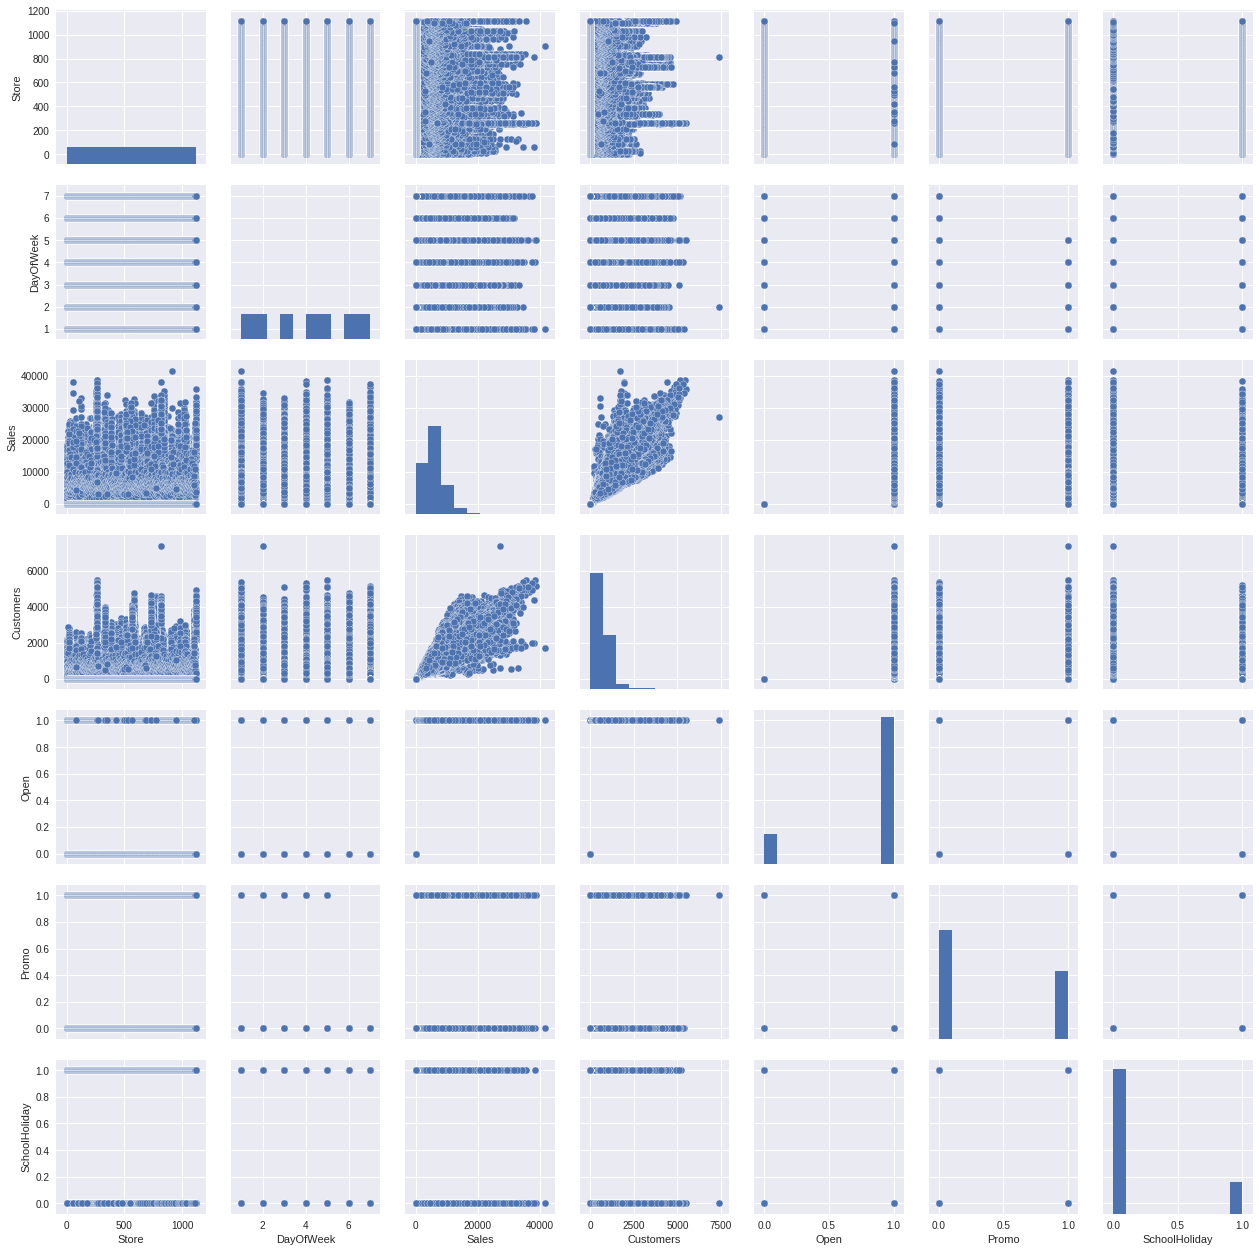

In [0]:
##exploração de dados
sns.pairplot(lojas)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'Sales')

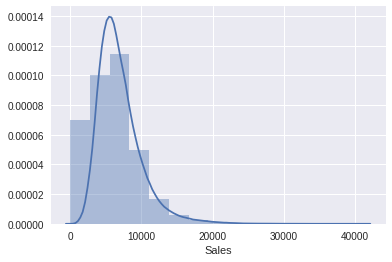

In [0]:
#distribuicao de vendas 
sns.distplot(lojas['Sales'], bins=15)
plt.xlabel('Sales')

In [0]:
#media de vendas do período
lojas['Sales'].mean()

5773.818972305593

In [0]:
mean = lojas['Sales'].mean()
sd = lojas['Sales'].std()

sd

3849.926175241448

In [0]:
valor_correcao = mean + 2 *sd
valor_correcao

13473.67132278849

In [0]:
valor_correcao2 = mean - 2 *sd
valor_correcao2

-1926.0333781773033

In [0]:
#media de consumidores 
lojas['Customers'].median()


609.0

In [0]:
lojas['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [0]:
lojas['StateHoliday'].value_counts()



0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [0]:
lojas.loc[lojas.Sales >13473, 'Sales'] = 5773


In [0]:
lojas.loc[lojas.Sales < -1926, 'Sales'] = 5773



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'Sales')

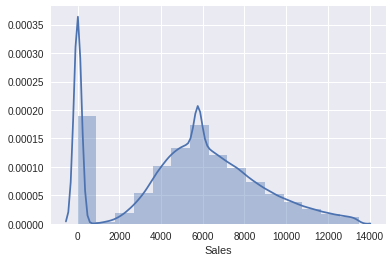

In [0]:
#distribuicao de vendas 
sns.distplot(lojas['Sales'], bins=15)
plt.xlabel('Sales')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


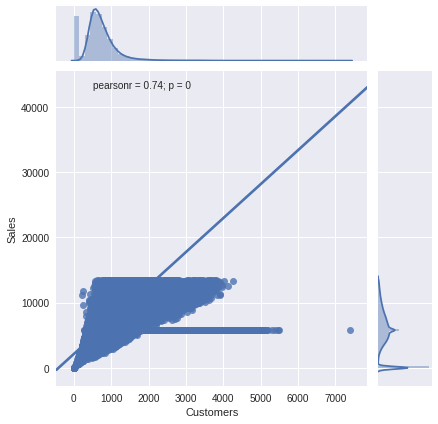

In [0]:
#regressao vendas consumidores
sns.jointplot(x='Customers', y='Sales', data=lojas, kind='reg')


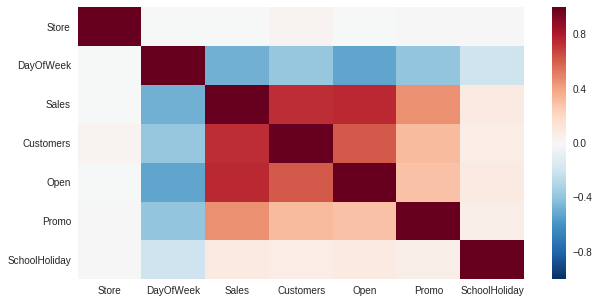

In [0]:
#correlação entre variaveis 
plt.figure(figsize=(10,5))

sns.heatmap(lojas.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


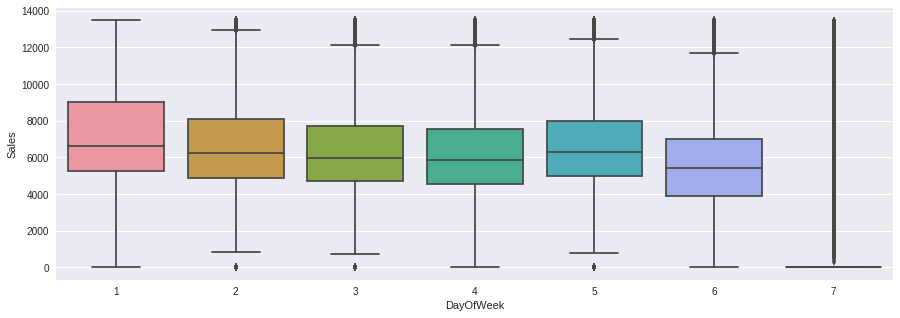

In [0]:
## valor mediano vendido por dia da semana 
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='DayOfWeek', data=lojas)

In [0]:
#valor médio por loja

lojas['valor_medio'] = lojas['Sales']/lojas['Customers']

In [0]:
#formatação de datas

lojas['data_formatada'] = pd.to_datetime(lojas['Date'])


In [0]:
#criação de novos campos
lojas['Ano'] = lojas['data_formatada'].apply(lambda data: data.year)
lojas['Mes'] = lojas['data_formatada'].apply(lambda data: data.month)
lojas['Dia'] = lojas['data_formatada'].apply(lambda data: data.day)
lojas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,valor_medio,data_formatada,Ano,Mes,Dia
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,2015-07-31,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,2015-07-31,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,2015-07-31,2015,7,31
3,4,5,2015-07-31,5773,1498,1,1,0,1,3.853805,2015-07-31,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,2015-07-31,2015,7,31


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5, 0, 'valor_medio')

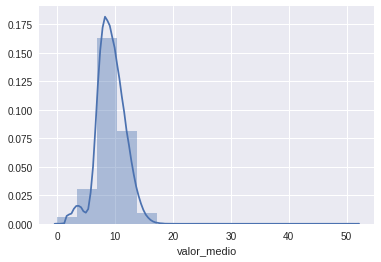

In [0]:
#distribuicao de vendas 
sns.distplot(lojas['valor_medio'], bins=15)
plt.xlabel('valor_medio')

Text(0.5, 0, 'VEndas')

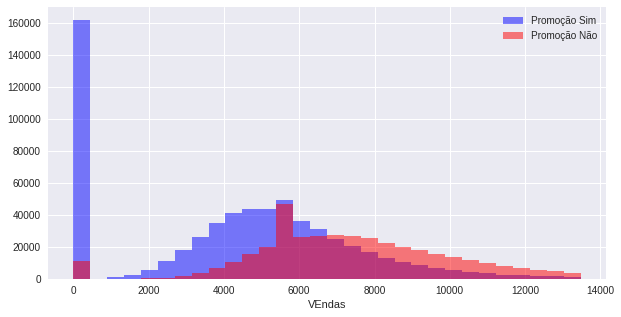

In [0]:
##comparativo entre vendas entre dias com promoções e dias com não promoções
plt.figure(figsize=(10,5))
lojas[lojas['Promo']==0]['Sales'].hist(alpha=0.5, color='blue', bins=30, label='Promoção Sim')
lojas[lojas['Promo']==1]['Sales'].hist(alpha=0.5, color='red', bins=30, label='Promoção Não')
plt.legend()
plt.xlabel('VEndas')


Text(0.5, 0, 'VEndas')

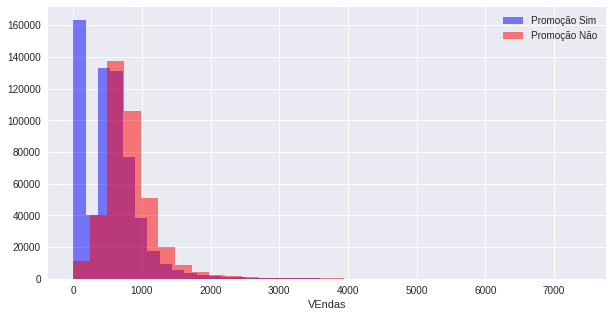

In [0]:
##comparativo entre clientes entre dias com promoções e dias com não promoções
plt.figure(figsize=(10,5))
lojas[lojas['Promo']==0]['Customers'].hist(alpha=0.5, color='blue', bins=30, label='Promoção Sim')
lojas[lojas['Promo']==1]['Customers'].hist(alpha=0.5, color='red', bins=30, label='Promoção Não')
plt.legend()
plt.xlabel('VEndas')


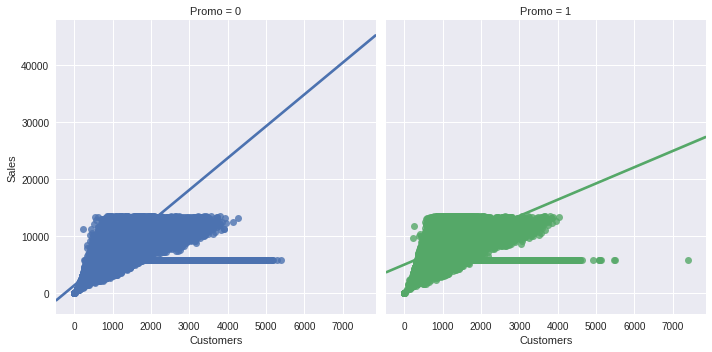

In [0]:
##comparativo entre vendas entre dias com promoções e dias com não promoções

sns.lmplot(x='Customers', y='Sales', data=lojas, hue='Promo', col='Promo')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


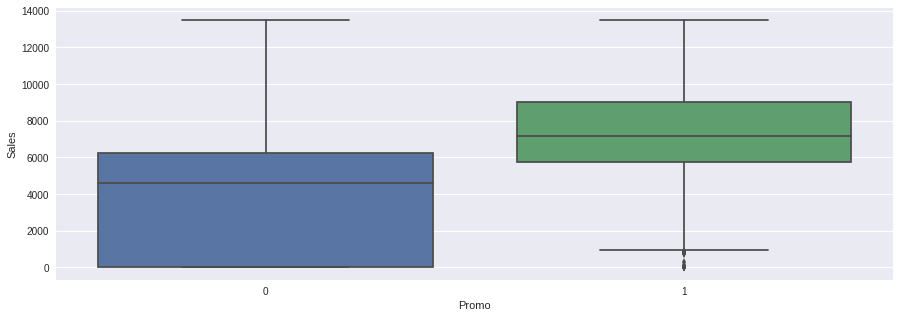

In [0]:
## venda entre dias com promoção
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='Promo', data=lojas)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


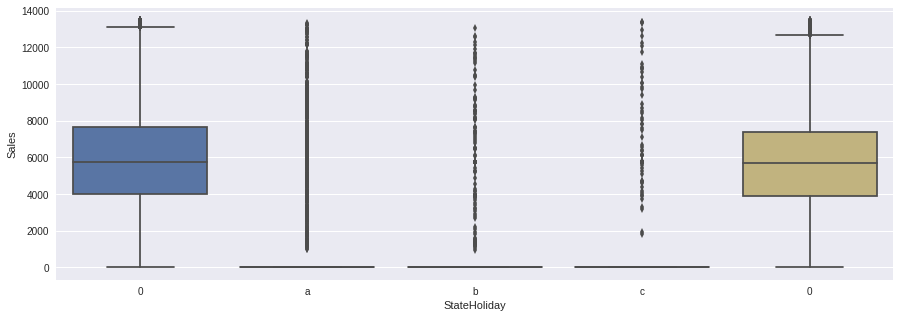

In [0]:
## Vendas em feriados 
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='StateHoliday', data=lojas)
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


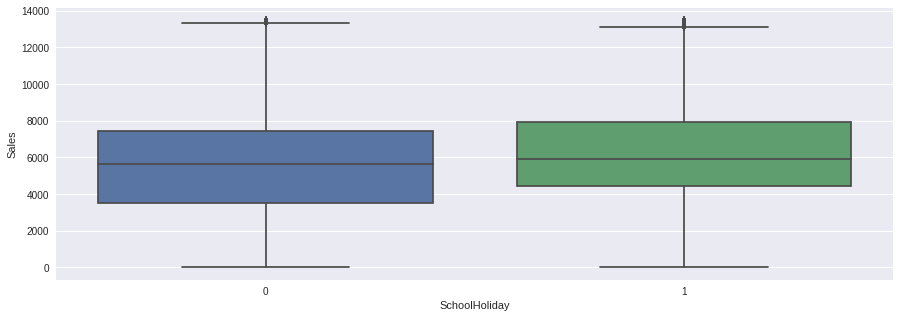

In [0]:
## Vendas em feriado escolar 
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='SchoolHoliday', data=lojas)
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


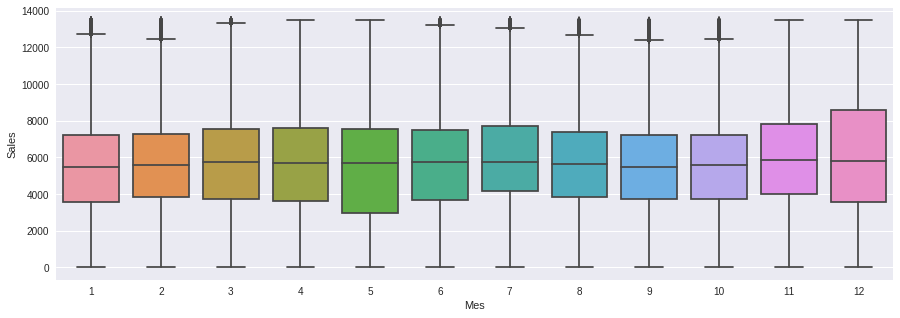

In [0]:
## venda mediana por mes 
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='Mes', data=lojas)
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


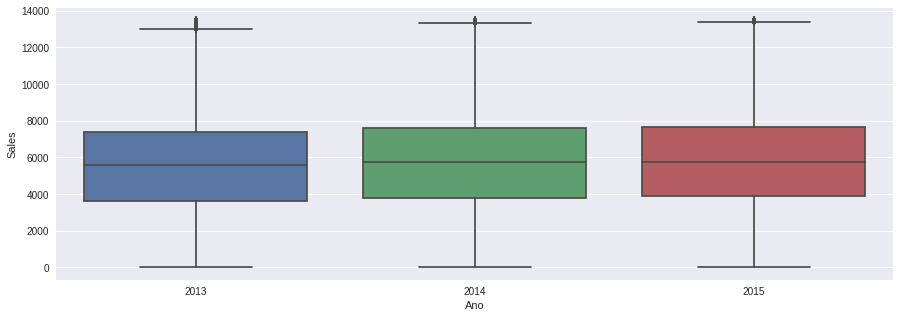

In [0]:

## venda por Ano
plt.figure(figsize=(15,5))

sns.boxplot(y='Sales', x='Ano', data=lojas)
    

In [0]:
lojas['valor_medio'].fillna(value=lojas['valor_medio'].median(), inplace=True)

In [0]:
#variável alvo
y = lojas['Sales']

In [0]:
#variavel preditora
x = lojas[['Store','Open','Promo','SchoolHoliday', 'Dia', 'Mes']]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_tran, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(X_train, y_tran)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(lm.intercept_)

-290.0552817780044


In [0]:
print(lm.coef_)

[-1.09783239e-02  5.87498014e+03  1.73956838e+03  7.03205515e+01
 -1.78072994e+00  3.44277621e+01]


In [0]:
x.columns

Index(['Store', 'Open', 'Promo', 'SchoolHoliday', 'Dia', 'Mes'], dtype='object')

In [0]:
#coeficientes
coef = pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
Store,-0.010978
Open,5874.980137
Promo,1739.568377
SchoolHoliday,70.320552
Dia,-1.780730
Mes,34.427762


In [0]:
#valor de teste
predict = lm.predict(X_test)

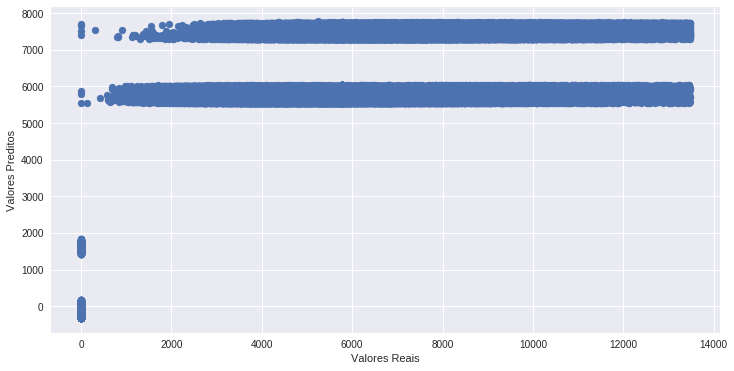

In [0]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
plt.figure(figsize=(12,6))
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.scatter(y_test, predict)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


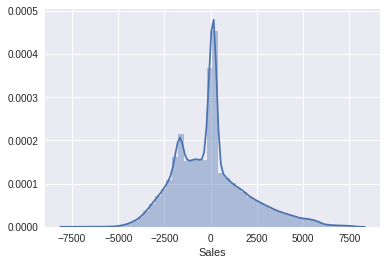

In [0]:
#distribuição normal do votos, o modelo tem um grande desvio padrão
sns.distplot((y_test-predict))

In [0]:
from sklearn import metrics
#erros do modelo
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict))**0.5)

MAE: 1476.8467210214703
MSE: 3969832.1452122177
RMSE: 44.63679829602848


In [0]:
##simula dados de x valor gasto
preditor = lm.predict([[0, 1, 1,1,20,5]])
preditor

array([7531.33799578])

In [0]:
previsoes = lm.score(X_test,y_test)
previsoes

0.6280727161676998

In [0]:
lojas_test = pd.read_csv("/content/drive/My Drive/kaggle_desafio/dataset_teste.csv", delimiter = ',')

In [0]:
lojas_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [0]:
lojas_test['ano_formatado'] = lojas_test['Date'].apply(lambda x: pd.to_datetime(x))
lojas_test['Ano'] = lojas_test['ano_formatado'].apply(lambda time: time.year)
lojas_test['Mes'] = lojas_test['ano_formatado'].apply(lambda time: time.month)
lojas_test['Dia'] = lojas_test['ano_formatado'].apply(lambda time: time.day)

In [0]:

lojas_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
ano_formatado    41088 non-null datetime64[ns]
Ano              41088 non-null int64
Mes              41088 non-null int64
Dia              41088 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 3.8+ MB


In [0]:
XTest  = lojas_test[['Store',  'Open', 'Promo',  'SchoolHoliday', 'Dia', 'Mes']]

In [0]:
XTest.fillna(X_train.mean(), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
novo_test = lm.predict(XTest)
novo_test

array([7604.05970406, 7604.03774741, 7603.99383411, ..., 5846.34734737,
       5846.33636904, 5916.64594224])

In [0]:
dfPredito = pd.DataFrame(novo_test)
dfPredito.count()

0    41088
dtype: int64

In [0]:
previsaofinal = pd.concat([XTest,dfPredito], axis=1)
previsaofinal.head()

,Store,Open,Promo,SchoolHoliday,Dia,Mes,0
0,1,1.0,1,0,17,9,7604.059704
1,3,1.0,1,0,17,9,7604.037747
2,7,1.0,1,0,17,9,7603.993834
3,8,1.0,1,0,17,9,7603.982856
4,9,1.0,1,0,17,9,7603.971877


In [0]:
previsaofinal['Sales'] = round(previsaofinal[0], 2)


In [0]:
previsaofinal.head()

,Store,Open,Promo,SchoolHoliday,Dia,Mes,0,Sales
0,1,1.0,1,0,17,9,7604.059704,7604.06
1,3,1.0,1,0,17,9,7604.037747,7604.04
2,7,1.0,1,0,17,9,7603.993834,7603.99
3,8,1.0,1,0,17,9,7603.982856,7603.98
4,9,1.0,1,0,17,9,7603.971877,7603.97


In [0]:
del previsaofinal['Open']
del previsaofinal['Promo']
del previsaofinal['SchoolHoliday']
del previsaofinal['Dia']
del previsaofinal['Mes']
del previsaofinal[0]







In [0]:
previsaofinal.to_csv('/content/drive/My Drive/kaggle_desafio/resultado_final.csv', index = True)
